# Notebook for calculating exposure time vs. Vmag and SNR for FIDEOS

This code was developed for the TUCAN-1 Collaboration, U. de Antioquia (Colombia) + U. Católica del Norte (Chile) by Germán Chaparro (german.chaparro@udea.edu.co).

In [1]:
import numpy as np
from scipy.optimize import brentq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
poptA=np.array([-0.4412292 ,  2.69454634]) # do not change
poptB=np.array([0.02314102, -0.26984885]) # do not change
# best fit values from https://github.com/saint-germain/TUCAN-1/blob/main/FIDEOS-calculator.ipynb

def exp_time_fideos(Vmag,SNR,poptA=poptA,poptB=poptB):
    # estimates exposure time given Vmag and desired SNR
    A=10**(Vmag*poptA[0]+poptA[1])
    B=10**(Vmag*poptB[0]+poptB[1])
    texp=(SNR/A)**(1/B)
    return texp # in seconds

def find_vlim(SNR,texp,poptA=poptA,poptB=poptB):
    # estimates limiting magnitude from desired SNR and exposure time
    def rootfunc(b,SNR,texp,poptA=poptA,poptB=poptB):
        # helper function to find root of previous function
        f1=(np.log10(SNR/texp**b)-poptA[1])/poptA[0]
        f2=(np.log10(b)-poptB[1])/poptB[0]
        return(f1-f2)    
    bopt=brentq(rootfunc,0.01,1,args=(SNR,texp))
    Vlim=(np.log10(bopt)-poptB[1])/poptB[0]
    return Vlim # in mag


### Find exposure time from the V magnitude and desired SNR

This function receives the visual magnitude of the source and the desired Signal-to-Noise ratio to be achieved as input. The function yields the exposure time in seconds.

In [3]:
exp_time_fideos(Vmag=10,SNR=40)/3600 # in hours

1.1768709789218386

### Find limiting magnitude from the desired SNR and exposure time

Given a specific exposure time (for example, when limited by altitude of the source or other factors), and a desired SNR to be achieved, this function calculates the limiting (maximum) V magnitude that can be observed under the previous constraints.

In [4]:
find_vlim(SNR=70,texp=3600) # 1 hour

8.872179325501152

### Vmag vs SNR vs exposure time plot

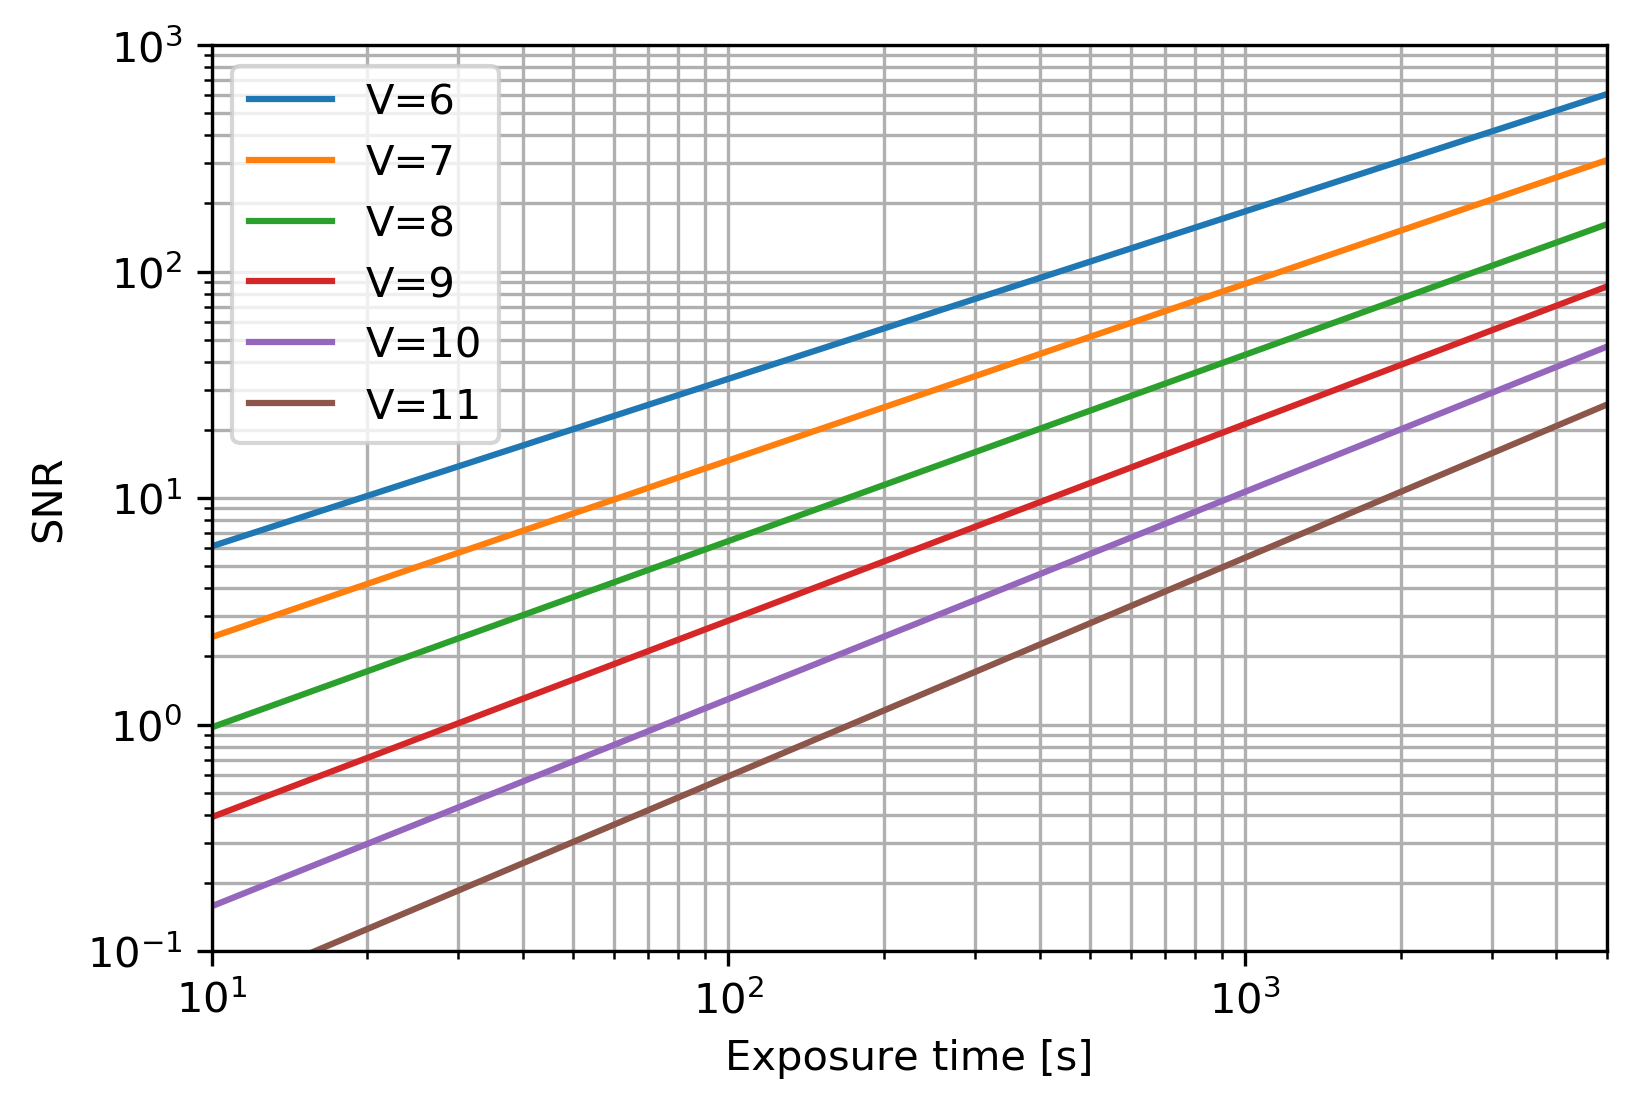

In [6]:
# compare to Fig. 8 in Vanzi et al 2018 https://arxiv.org/pdf/1804.07441.pdf

Var=np.array([6,7,8,9,10,11])
names=['V='+str(i) for i in Var]

Aar=10**(Var*poptA[0]+poptA[1])
Bar=10**(Var*poptB[0]+poptB[1])

time=np.linspace(1e1,5e3,10)

plt.figure(dpi=300)
for ai,bi,label in zip(Aar,Bar,names):
    plt.plot(time,ai*time**bi,label=label)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Exposure time [s]')
plt.ylabel('SNR')
plt.xlim(time.min(),time.max())
plt.ylim(1e-1,1e3)
plt.grid(which='both')